In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
%matplotlib inline

## No of blobs = 4

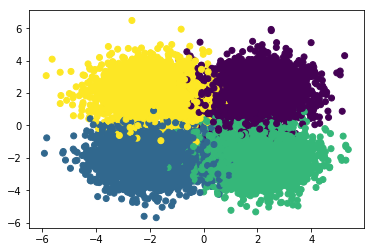

In [2]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### KMeans method

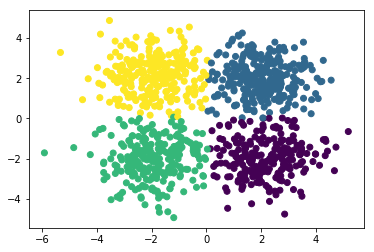

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        5    6  226    0
1      260    0    3    2
2        0  228    9    7
3        8    5    0  241


In [3]:
# Calculate predicted values.
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

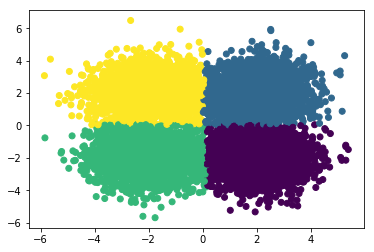

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0        55    46  2139     1
1      2116     0    49    50
2         2  2172    72    51
3        54    43     2  2148
Centers:
[[ 2.17036242 -1.96886411]
 [ 2.03629633  2.00616566]
 [-1.9117566  -2.03311251]
 [-1.95131037  2.15794269]]


In [4]:

y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [5]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.5202094888704099


### Mean Shift method

In [6]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


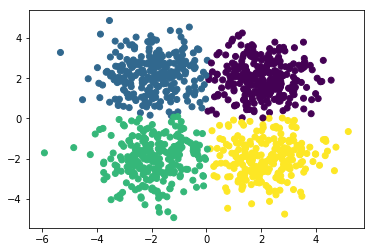

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0


In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

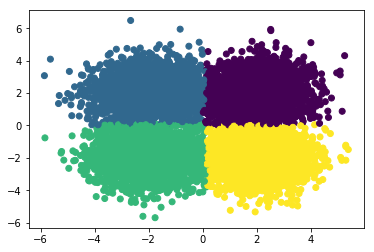

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0      2114     0    48    48
1        56    39     1  2148
2         2  2178    73    53
3        55    44  2140     1


In [8]:

y_pred = ms.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [9]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.5200923073283324


### Spectral Clustering method

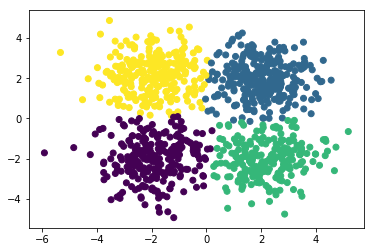

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  263    2    8
1      228    0    6    5
2       11    5  222    0
3        8    3    0  239


In [10]:
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

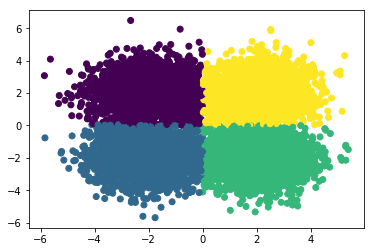

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0        52    44     2  2148
1         2  2157    52    48
2        51    59  2159     2
3      2122     1    49    52


In [11]:
y_pred = sc.fit_predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [12]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.5205691023952784


### Affinity Propogation method

In [13]:
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 25


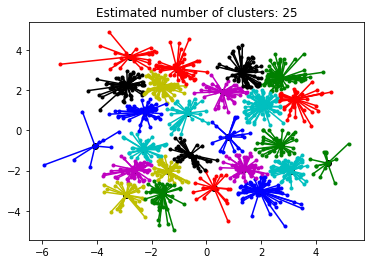

In [14]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

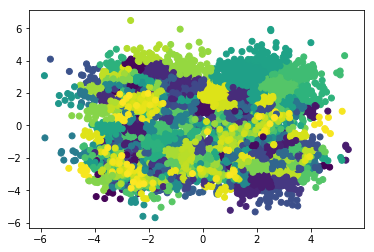

Comparing the assigned categories to the ones in the data:
col_0   0   1  2   3
row_0               
0       0   1  0   0
1       0   0  0   1
2       0   0  0   1
3       0   0  0   1
4       0   0  0   1
5       0   0  0   5
6       0   0  0   1
7       0   0  1   0
8       1   0  0   0
9       0   0  0   1
10      0   1  0   0
11      0   0  0  13
12      0   0  4   0
13      1   0  0   0
14      0   5  0   0
15      1   0  0   0
16      1   0  0   0
17      0   1  0   0
18      0   1  0   0
19      0   0  0   1
20      0   1  0   0
21      1   0  0   0
22      0   0  0   1
23      0   5  0   0
24      0   0  5   0
25      0   0  0   2
26      0   0  1   0
27      0   0  0  35
28      0   1  0   0
29      0   1  0   0
...    ..  .. ..  ..
1656    0   1  0   0
1657   13   0  0   0
1658    0   0  0   1
1659    0   1  0   0
1660    5   0  3   0
1661    0  10  0   0
1662    0   0  0   1
1663    0   4  0  22
1664    0   1  0   0
1665    0   0  0   8
1666    0   0  1   0
1667    0   0  1 

In [15]:
y_pred = af.fit_predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [16]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.13598454024211695


## No of Blobs = 2

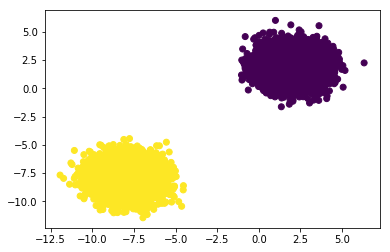

In [17]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-8, -8]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=24)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=24)

### KMeans method

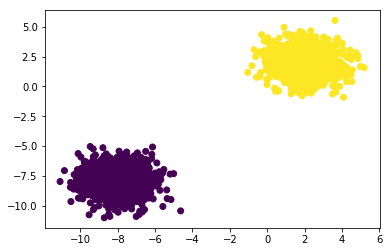

Comparing k-means clusters against the data:
col_0     0    1
row_0           
0         0  992
1      1008    0


In [18]:
# Calculate predicted values.
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

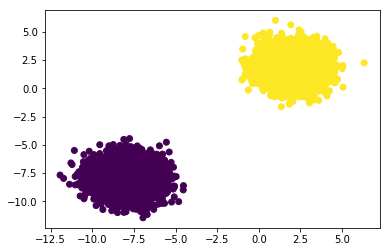

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0         0  4008
1      3992     0
Centers:
[[-8.01075461 -7.99689927]
 [ 1.98787135  1.97632421]]


In [19]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [20]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.8749654710088263


### Mean Shift method

In [21]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.3, n_samples=100)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 2


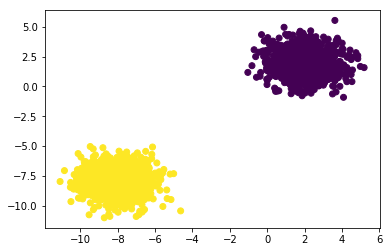

Comparing the assigned categories to the ones in the data:
col_0     0    1
row_0           
0      1008    0
1         0  992


In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

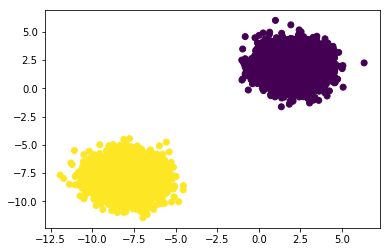

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      3992     0
1         0  4008
Centers:
[[ 1.96354541  1.96551691]
 [-8.02760959 -8.00403405]]


In [23]:
y_pred = ms.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(ms.cluster_centers_)

In [24]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.8749654710088263


### Spectral Clustering method

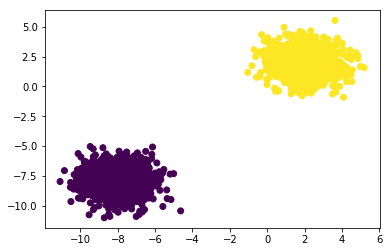

Comparing the assigned categories to the ones in the data:
col_0    0     1
row_0           
0        0  1008
1      992     0


In [25]:
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

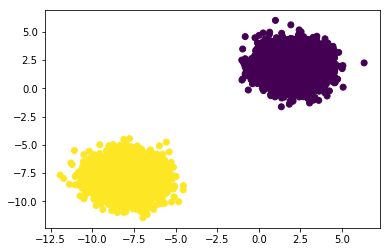

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      3992     0
1         0  4008


In [26]:
y_pred = sc.fit_predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))



In [27]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.8749654710088263


### Affinity Propogation method

In [28]:
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 730


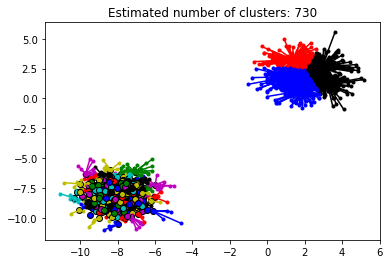

In [29]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

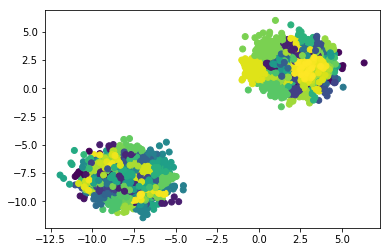

Comparing the assigned categories to the ones in the data:
col_0   0   1
row_0        
0       1   0
1       0   1
2       0   2
3       1   0
4       1   0
5       1   0
6       1   0
7       1   0
8       1   0
9       0   1
10      0   1
11      1   0
12      1   0
13      0   2
14      0   1
15      1   0
16      1   0
17      1   0
18      1   0
19      0  13
20      1   0
21      0   1
22      1   0
23     35   0
24      1   0
25      0   1
26      0   9
27      1   0
28      1   0
29      0   2
...    ..  ..
1785    0   1
1786    1   0
1787    1   0
1788    1   0
1789    1   0
1790    1   0
1791    0   8
1792    1   0
1793    0   1
1794    1   0
1795    1   0
1796    1   0
1797    1   0
1798    1   0
1799    1   0
1800    1   0
1801    1   0
1802    1   0
1803    1   0
1804    1   0
1805    0   1
1806    1   0
1807    1   0
1808    1   0
1809    1   0
1810    1   0
1811    1   0
1812    1   0
1813    1   0
1814    1   0

[1815 rows x 2 columns]


In [30]:
y_pred = af.fit_predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_pred,y_test))

In [31]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.10796196293619453


## No of Blobs = 5

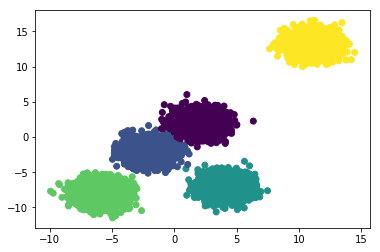

In [32]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2],[4,-7], [-6,-8], [11,13]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=24)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=24)

### KMeans method

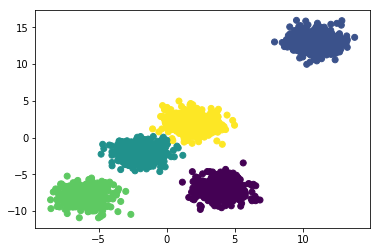

Comparing k-means clusters against the data:
col_0    0    1    2    3    4
row_0                         
0        0    0  414    0    0
1        0    0    0    0  403
2        0  389    0    0    0
3        0    0    0  395    0
4      399    0    0    0    0


In [33]:

# Calculate predicted values.
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

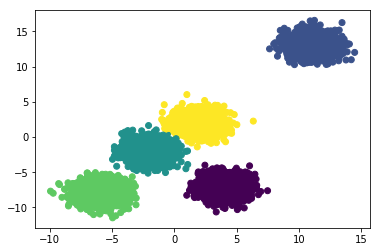

Comparing k-means clusters against the data:
col_0     0     1     2     3     4
row_0                              
0         0     0  1585     0     0
1         0     0     0     0  1597
2         0  1609     1     0     0
3         0     0     0  1605     0
4      1601     2     0     0     0
Centers:
[[ 3.98557428 -7.00346922]
 [11.0060505  12.98979328]
 [-1.95384986 -2.02373025]
 [-6.02269659 -7.98303332]
 [ 1.92895336  1.96814416]]


In [34]:
y_pred = kmeans.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(kmeans.cluster_centers_)

In [35]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.7541956980288765


### Mean Shift method

In [36]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.10, n_samples=100)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 5


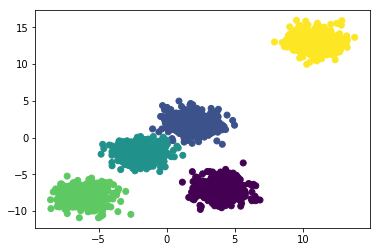

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0  399    0    0    0
1        0    0  389    0    0
2      414    0    0    0    0
3        0    0    0  395    0
4        0    0    0    0  403


In [37]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

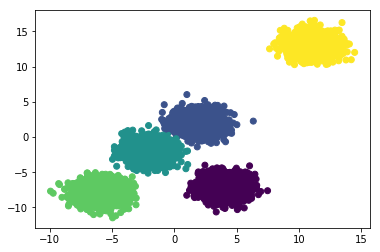

Comparing k-means clusters against the data:
col_0     0     1     2     3     4
row_0                              
0         0     0  1585     0     0
1      1601     2     0     0     0
2         0  1609     1     0     0
3         0     0     0  1605     0
4         0     0     0     0  1597
Centers:
[[ 3.96851835 -7.03051984]
 [ 1.91506164  1.94225963]
 [-2.01254899 -1.94367779]
 [-6.13521637 -7.95628389]
 [11.15257683 12.88681301]]


In [38]:
y_pred = ms.predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

print('Centers:')
print(ms.cluster_centers_)

In [39]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.7541956980288765


### Spectral Clustering method

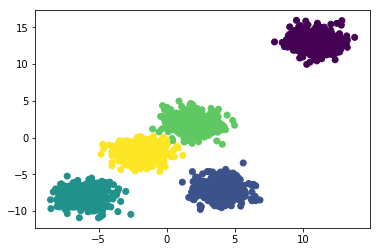

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0    0  399    0
1        0    0    0    0  389
2        0  414    0    0    0
3        0    0  395    0    0
4      403    0    0    0    0


In [40]:
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

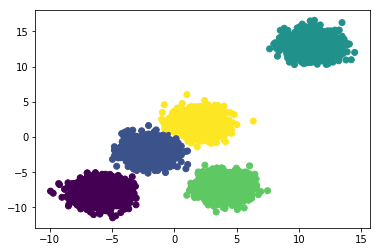

Comparing k-means clusters against the data:
col_0     0     1     2     3     4
row_0                              
0         0     0     0  1605     0
1         0  1609     1     0     0
2         0     0     0     0  1597
3         0     0  1585     0     0
4      1601     2     0     0     0


In [41]:
y_pred = sc.fit_predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

In [42]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.7541956980288765


### Affinity Propogation method

In [43]:
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 171


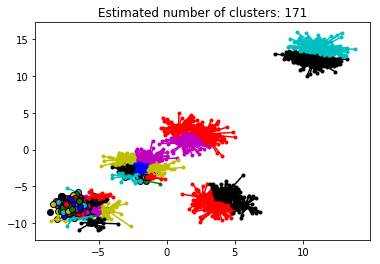

In [44]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

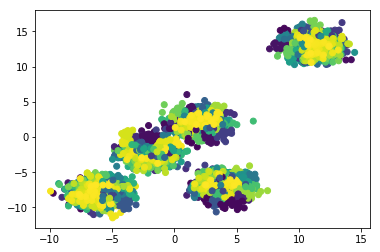

Comparing k-means clusters against the data:
col_0  0  1   2   3  4
row_0                 
0      0  0   0   0  1
1      0  0   0   0  1
2      0  0   0   0  1
3      0  0   0   0  1
4      0  0   0   1  0
5      0  0  10   0  0
6      0  0   1   0  0
7      0  0   0   1  0
8      0  0   0   1  0
9      0  1   0   0  0
10     0  0   0   1  0
11     0  0   0   1  0
12     0  0   1   0  0
13     1  0   0   0  0
14     1  0   0   0  0
15     1  0   0   0  0
16     1  0   0   0  0
17     0  0   0   1  0
18     0  0   0   1  0
19     0  1   0   0  0
20     0  0   0   0  1
21     0  0   1   0  0
22     0  0   0   0  1
23     0  0   1   0  0
24     0  0   0   0  1
25     0  0   0   0  1
26     0  0   1   0  0
27     0  0   0   0  1
28     0  0   0   1  0
29     0  0   1   0  0
...   .. ..  ..  .. ..
4360   0  0   1   0  0
4361   0  0   0   1  0
4362   1  0   0   0  0
4363   1  0   0   0  0
4364   0  0   0   1  0
4365   0  0   0  12  0
4366   0  1   0   0  0
4367   0  0   0   1  0
4368   0  0 

In [45]:
y_pred = af.fit_predict(X_test)

# Plot the solution.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_test))

In [46]:
# Score
score = silhouette_score(X_test, y_pred)

print('Score: ', score)

Score:  0.0747659472374587


## Conclusion:

When the clusters are placed with centroids near to each other, as seen in case 1, the scores vary little bit across K Means, Mean Shift and Spectral clustering but the affinity propogation gives lowest scores . When the centroids are at varying distance as seen when no of clusters are 2 and 5, we see that the first 3 methods provide the same scores and affinity method is the lowest. When the centroids are not equidistant, the datapoints are more concentrated towards the negative axis. Highest scores were for the 2 blobs where as the lowest scores were for the 4 blobs. This was influenced by the cluster centroids. We need to see how scores vary when clusters are more or less but centers are the same.  